In [ ]:
import warnings,logging
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [ ]:
! pip install transformers -q

In [ ]:
from transformers import pipeline

In [ ]:
ocr = pipeline('image-to-text', model = "microsoft/trocr-base-handwritten")

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

In [ ]:
!wget -O handwriting.jpg 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoolxi9yWGAT5SLZShv8vVd0bz47UWRzQC19fDTeE8GmGv_Rn-PCF1pP1rrUx8kOjA4gg&usqp=CAU'

--2025-01-02 10:54:03--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoolxi9yWGAT5SLZShv8vVd0bz47UWRzQC19fDTeE8GmGv_Rn-PCF1pP1rrUx8kOjA4gg&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.210.101, 173.194.210.139, 173.194.210.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.210.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4324 (4.2K) [image/jpeg]
Saving to: ‘handwriting.jpg’

handwriting.jpg     100%[===================>]   4.22K  --.-KB/s    in 0s      

2025-01-02 10:54:03 (37.2 MB/s) - ‘handwriting.jpg’ saved [4324/4324]



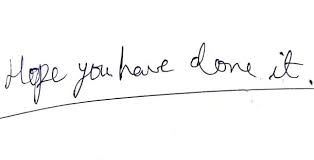

In [ ]:
from IPython.display import Image
Image(filename='handwriting.jpg')

In [ ]:
ocr_hw('handwriting.jpg')

[{'generated_text': 'Hope you have done it .'}]

!wget -O handwriting.jpg 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoolxi9yWGAT5SLZShv8vVd0bz47UWRzQC19fDTeE8GmGv_Rn-PCF1pP1rrUx8kOjA4gg&usqp=CAU'

In [ ]:
ocr_ty = pipeline('image-to-text', model = "microsoft/trocr-base-printed")

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

In [ ]:
!wget -O typed.jpg 'https://jeroen.github.io/images/testocr.png'

--2025-01-02 10:57:13--  https://jeroen.github.io/images/testocr.png
Resolving jeroen.github.io (jeroen.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to jeroen.github.io (jeroen.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23359 (23K) [image/png]
Saving to: ‘typed.jpg’

typed.jpg           100%[===================>]  22.81K  --.-KB/s    in 0.001s  

2025-01-02 10:57:14 (16.1 MB/s) - ‘typed.jpg’ saved [23359/23359]



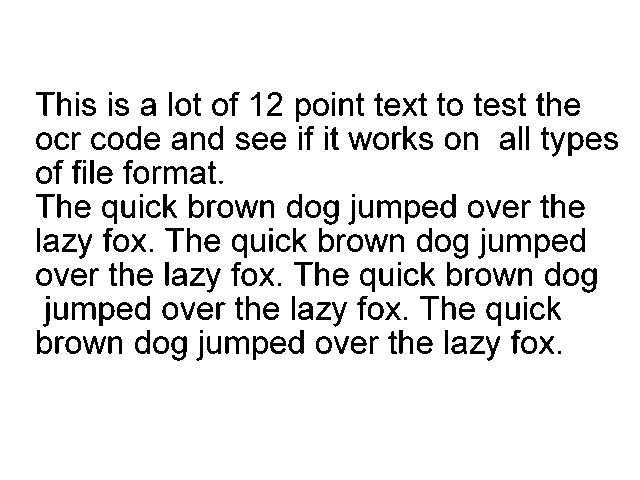

In [ ]:
from IPython.display import Image
Image(filename='typed.jpg')

In [ ]:
ocr_ty('typed.jpg')

[{'generated_text': 'ITEMOUNT'}]

In [1]:
import easyocr
import matplotlib.pyplot as plt  # For displaying the image (optional)
from PIL import Image  # For image processing (optional)
import io #For handling file uploads

def extract_text_from_uploaded_image(uploaded_file):
    """
    Extracts text from an uploaded image using EasyOCR.

    Args:
        uploaded_file: A file object representing the uploaded image.
          This can be a file-like object from a framework like Streamlit, Gradio, etc.
          Or it can be a path to a file.

    Returns:
        A string containing the extracted text, or None if an error occurs.
        Also returns the image (PIL Image object) if successful, or None if failed.
    """
    try:
        # 1. Read the image (handle file-like objects or paths)
        if isinstance(uploaded_file, io.BytesIO) or hasattr(uploaded_file, 'read'): #Check if it's a file-like object
            image = Image.open(uploaded_file).convert('RGB') #Convert to RGB if necessary
        elif isinstance(uploaded_file, str): #Check if it's a string (path)
            image = Image.open(uploaded_file).convert('RGB')
        else:
            return None, None #Return None for both if not a valid file-like object or path

        # 2. Initialize the EasyOCR reader (do this ONCE, ideally outside the function if possible for efficiency)
        # You only need to specify the languages once.
        # The first time you call easyocr.Reader, it downloads the necessary models.
        try:
            reader = easyocr.Reader(['en']) # You can add more languages here, e.g., ['en', 'hi']
        except Exception as e:
            print(f"Error initializing OCR reader: {e}")
            return None, None

        # 3. Perform OCR
        results = reader.readtext(image)

        # 4. Extract the text
        extracted_text = ""
        for (bbox, text, score) in results:
            extracted_text += text + " "  # Add a space between words

        return extracted_text.strip(), image # Remove trailing spaces and return the image too

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None


# Example Usage (assuming you have an image file named "image.jpg"):
# extracted_text, image = extract_text_from_uploaded_image("image.jpg") #For local file

# Example Usage (with a file-like object, e.g. from a web framework)
# with open("image.jpg", "rb") as f: #Example with a local file opened as binary
#     uploaded_file = io.BytesIO(f.read())
#     extracted_text, image = extract_text_from_uploaded_image(uploaded_file)


# if extracted_text:
#     print("Extracted Text:", extracted_text)

#     #Optional: Display the image and the bounding boxes (for debugging)
#     # import cv2 #You may need to install opencv: pip install opencv-python
#     # import numpy as np
#     # img_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR) # Convert PIL to OpenCV format
#     # for (bbox, text, score) in results:
#     #     (tl, tr, br, bl) = bbox
#     #     tl = (int(tl[0]), int(tl[1]))
#     #     br = (int(br[0]), int(br[1]))
#     #     cv2.rectangle(img_cv2, tl, br, (0, 255, 0), 2)
#     #     cv2.putText(img_cv2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
#     # cv2.imshow("Image with Bounding Boxes", img_cv2)
#     # cv2.waitKey(0)
#     # cv2.destroyAllWindows()

#     plt.imshow(image)
#     plt.title("Uploaded Image")
#     plt.axis('off')  # Hide axes
#     plt.show()
# else:
#     print("Text extraction failed.")

ModuleNotFoundError: No module named 'easyocr'

In [2]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:


# Rest of your code
import easyocr
import matplotlib.pyplot as plt  # For displaying the image (optional)
from PIL import Image  # For image processing (optional)
import io #For handling file uploads

def extract_text_from_uploaded_image(uploaded_file):
    """
    Extracts text from an uploaded image using EasyOCR.

    Args:
        uploaded_file: A file object representing the uploaded image.
          This can be a file-like object from a framework like Streamlit, Gradio, etc.
          Or it can be a path to a file.

    Returns:
        A string containing the extracted text, or None if an error occurs.
        Also returns the image (PIL Image object) if successful, or None if failed.
    """
    try:
        # 1. Read the image (handle file-like objects or paths)
        if isinstance(uploaded_file, io.BytesIO) or hasattr(uploaded_file, 'read'): #Check if it's a file-like object
            image = Image.open(uploaded_file).convert('RGB') #Convert to RGB if necessary
        elif isinstance(uploaded_file, str): #Check if it's a string (path)
            image = Image.open(uploaded_file).convert('RGB')
        else:
            return None, None #Return None for both if not a valid file-like object or path

        # 2. Initialize the EasyOCR reader (do this ONCE, ideally outside the function if possible for efficiency)
        # You only need to specify the languages once.
        # The first time you call easyocr.Reader, it downloads the necessary models.
        try:
            reader = easyocr.Reader(['en']) # You can add more languages here, e.g., ['en', 'hi']
        except Exception as e:
            print(f"Error initializing OCR reader: {e}")
            return None, None

        # 3. Perform OCR
        results = reader.readtext(image)

        # 4. Extract the text
        extracted_text = ""
        for (bbox, text, score) in results:
            extracted_text += text + " "  # Add a space between words

        return extracted_text.strip(), image # Remove trailing spaces and return the image too

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None


# Rest of the code

In [5]:
!wget -O typed.jpg 'https://jeroen.github.io/images/testocr.png'

--2025-01-31 06:07:25--  https://jeroen.github.io/images/testocr.png
Resolving jeroen.github.io (jeroen.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jeroen.github.io (jeroen.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23359 (23K) [image/png]
Saving to: ‘typed.jpg’

typed.jpg           100%[===================>]  22.81K  --.-KB/s    in 0.002s  

2025-01-31 06:07:25 (13.9 MB/s) - ‘typed.jpg’ saved [23359/23359]



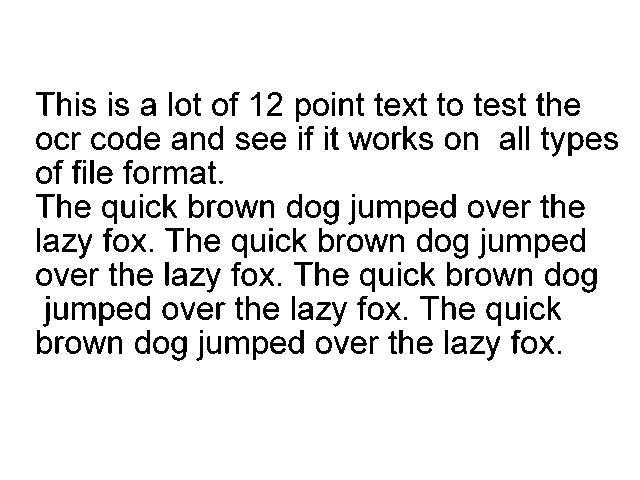

In [6]:
from IPython.display import Image
Image(filename='typed.jpg')

In [8]:
from google.colab import files
uploaded = files.upload()

Saving typed.jpg to typed (1).jpg


In [9]:
extract_text_from_uploaded_image(uploaded)

(None, None)